# SVD BASED FACE RECOGNITION
### COMPUTATIONAL NUMERICAL METHODS [IT-509]

###### Submitted by : 
###### Alokendu Mazumder (201916003) 
###### Pious Pradhan (201916010)

In [1]:
# Importing Libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

* Dataset: The Yale Face Database contains 165 grayscale images in GIF format of 15 individuals. There are 11 images per subject, one per different facial expression or configuration: center-light, w/glasses, happy, left-light, w/no glasses, normal, right-light, sad, sleepy, surprised, and wink.

* The dataset is split into training and testing set. The system in trained on some faces and it will try to recognise faces which it hasn't seen before.

* Each image is converted to gray scale (Weighted Method) of size (100 * 100). 

* Each (100X100) image is stored as (10000*1) vector.

In [2]:
# Path for training images
Path2 = './dataimage/'
files2 = os.listdir(Path2)
images = []

#Readling all the images and storing into an array
for name in files2:
    temp = cv2.imread(Path2+name)
    temp = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    temp = cv2.resize(temp, (100,100), interpolation = cv2.INTER_AREA)
    images.append(temp.flatten())

* Images matrix has a dimension of (10000X30) representing 30 images stored in vector form.
* Mean image is subtracted from training image to center each pixel around 0 according to all images.
* Images matrix will provides a value for each individual image’s deviation from this training average.

In [3]:
#Substracting mean from all images for normalization    
images = np.array(images)
mu = np.mean(images,0)
images = images-mu
images = images.T
print (images.shape)

(10000, 30)


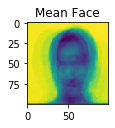

In [4]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(mu.reshape(100,100))
plt.title("Mean Face")
plt.show()

In [5]:
mu.shape

(10000,)

In [6]:
def plotImage(X):
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(X.reshape(100,100))
    plt.show()
    plt.close()

* The characteristics of faces remains intact even after subtracting average face.

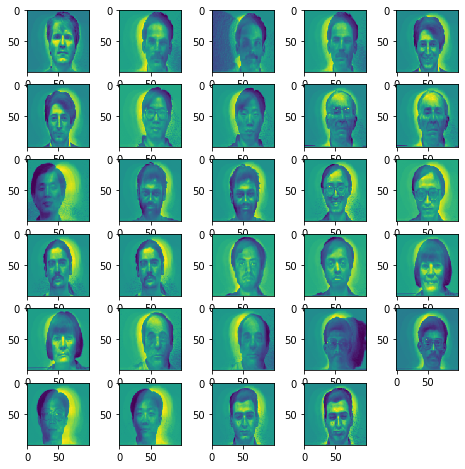

In [7]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 6
for i in range(1, images.shape[1]):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(images[:,i].reshape(100,100))
    
#plt.title("Faces after Mean face is subtracted from each face")
plt.show()

In [8]:
#SVD function
u,s,v = np.linalg.svd(images, full_matrices=False)
print (u.shape, s.shape , v.shape)

(10000, 30) (30,) (30, 30)


In [9]:
u

array([[ 4.98494339e-04,  2.94723266e-03,  8.48014687e-04, ...,
         5.79554935e-04, -2.39629780e-01, -3.88661238e-03],
       [ 5.06073744e-04,  2.05290866e-03,  2.85778052e-04, ...,
         1.78481270e-04, -5.69851364e-02,  6.35313473e-04],
       [ 5.20884953e-04,  1.45793841e-03,  1.70019439e-04, ...,
         9.38220269e-04,  1.58731817e-01,  1.65088991e-03],
       ...,
       [ 5.70357379e-03,  2.30624889e-03, -2.30273516e-03, ...,
         8.15655122e-04,  7.62735514e-03,  4.21836266e-04],
       [ 5.28812528e-03,  2.18396742e-03, -3.44508792e-03, ...,
         2.18940884e-04, -3.72375338e-03, -7.50118144e-04],
       [ 5.09757411e-03,  2.92673335e-03, -3.09598027e-03, ...,
        -4.20957063e-05,  1.08622073e-03, -8.98311957e-04]])

* Each eigenvector has the same dimensionality as the original images, and thus can itself be seen as an image.

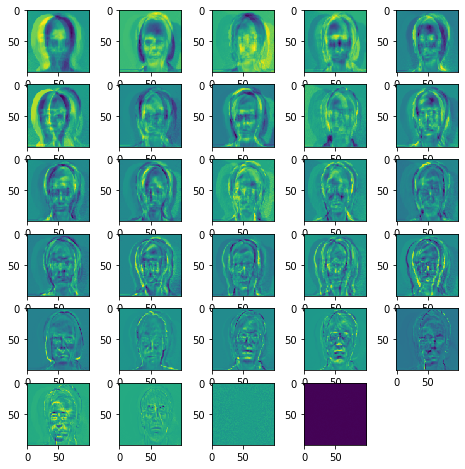

In [10]:
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 5
rows = 6
for i in range(1, images.shape[1]):
    img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i)
    plt.imshow(u[:,i].reshape(100,100))
    
#plt.title("Eigenfaces")
plt.show()

* Test image is converted to gray scale (Weighted Method) of size (100 * 100). 

In [11]:
#Reading test image as an input, converting into 100*100

test = np.array(cv2.imread('./test_images/subject06.normal.jpg'))
test = cv2.cvtColor(test,cv2.COLOR_BGR2GRAY)
test = cv2.resize(test, (100,100), interpolation = cv2.INTER_AREA)

img = test.reshape(1, -1)

#Substracting mean
img = img-mu

img = img.T
print("Dimension of Test Image:", img.shape)


Dimension of Test Image: (10000, 1)


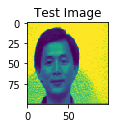

In [12]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(test.reshape(100,100))
plt.title("Test Image")
plt.show()

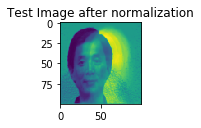

In [13]:
plt.figure(figsize=(1.5, 1.5))
plt.imshow(img.reshape(100,100))
plt.title("Test Image after normalization")
plt.show()

In [14]:
#Hadmard product of test image and U matrix
test_x = np.empty(shape = (u.shape[0], u.shape[1]), dtype=np.int8)
#print(test_x.shape)

for col in range(u.shape[1]):  
    test_x[:,col] = img[:,0] * u[:,col]
    #print(test_x)

#print(test_x.shape)
dot_test = np.array(test_x, dtype='int8').flatten()
#print(dot_test.shape)


In [15]:
print(dot_test.shape)

(300000,)


In [17]:
#Hadmard product of all the images and U matrix
dot_train = np.empty(shape = (u.shape[0]*u.shape[1], u.shape[1]),  dtype=np.int8)
temp = np.empty(shape = (u.shape[0], u.shape[1]),  dtype=np.int8)

for i in range(images.shape[1]):  
    for c in range(u.shape[1]):    
        temp[:,c] = images[:,i] * u[:,c]
    #print(temp.shape)    
    tempF = np.array(temp, dtype='int8').flatten()
    #print(tempF.shape)
    dot_train[:, i] = tempF[:]

#print(dot_train.shape)

In [25]:
print(dot_train.shape)


(300000, 30)


In [18]:
#Substracting Two dot products
sub = np.empty(shape = (u.shape[0]*u.shape[1], u.shape[1]))

for col in range(u.shape[1]):
    sub[:,col] = dot_train[:,col] - dot_test[:]


In [19]:
#Finding norm of all the columns
answer = np.empty(shape=(u.shape[1],))

for c in range(sub.shape[1]):    
    answer[c] = np.linalg.norm(sub[:,c])

In [20]:
print ("Norms:", answer)

Norms: [492.09551918 511.14772816 620.89773715 519.71434462 618.13348073
 470.89383092 468.64272106 588.02125812 588.39442553 498.85168136
 502.96719575 200.38463015 457.07548611 459.55739576 430.62164367
 453.6650747  423.81599781 423.81599781 568.95518277 509.44185144
 573.70027018 584.42193662 565.2096956  596.82828351 597.13566298
 550.8366364  284.7051106  340.51284851 454.1398463  521.59946319]


In [21]:
#Sorting answer array and retreiving first element which will be minimum from all
temp_ans = np.empty(shape=(u.shape[1],))
temp=np.copy(answer)
temp.sort()
check = temp[0]
print (check)

200.38463014912097


In [22]:
index=0

for i in range(answer.shape[0]):
    if check == answer[i]:
        
        index=i
 
        break

In [23]:
#Checking for corresponding image for minimum answer
folder_tr = '/dataimage/'
i = 0
output_image_name = ''
print (index)
for filename in os.listdir(os.getcwd()+"/"+folder_tr):
    
    if index == i:
        print (("The predicted face is: {}").format(filename))
        output_image_name = filename
        break
        
    else:
        i=i+1


11
The predicted face is: subject06.sleepy.jpg


In [24]:
#Displaying output. 

# Reading test image
test_image = cv2.imread('./test_images/subject06.normal.jpg')                     

# Showing test image
cv2.imshow("test_image", test_image)

# waiting for key event
cv2.waitKey(0)

folder_tr = './dataimage/'

print (folder_tr + output_image_name)
output_image = cv2.imread(folder_tr + output_image_name)

# Showing output image
cv2.imshow("output_image", output_image)

# waiting for key event
cv2.waitKey(0)


# destroying all windows
cv2.destroyAllWindows()


./dataimage/subject06.sleepy.jpg


* If the minimum distance between test face and training faces is higher than a threshold θ, the test face is considered to be unknown, otherwise it is known and belongs to the person with minimum distance.

Future Improvements (If full dataset is preocessed) :
* A threshold can be found out for this dataset by running the algorithm on the entire dataset.

* If the resulting reconstruction error is greater than the threshold, then the tested image probably is not a face image.